<a href="https://colab.research.google.com/github/jessicasilvacodes/estatistica-pucminas/blob/main/comparacao_modelos_pucminas_JessicaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CURSO: CIÊNCIA DE DADOS APLICADA À SAÚDE | PUC MINAS
### DISCIPLINA: TÉCNICAS DE AMOSTRAGEM E MODELOS DE REGRESSÃO
### MÓDULO: FUNDAMENTOS DE AMOSTRAGEM E DISTRIBUIÇÃO

EXERCÍCIOS:

- COMPARANDO MODELOS UTILIZANDO AS MÉTRICAS DE AVALIAÇÃO DE MODELOS

Importando bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

Importando o Dataset "diabetes" do [Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html):

In [3]:
from sklearn import datasets
data  = datasets.load_diabetes()
X = data.data
y = data.target
feature_names = data.feature_names

### Contextualização:

O conjunto de dados de diabetes usado neste exemplo é proveniente do *Sklearn datasets*. As variáveis presentes no conjunto de dados são:

*   age: Idade do paciente.
*   sex: Gênero do paciente (0: feminino, 1: masculino).
*   bmi: Índice de massa corporal (IMC).
*   bp: Pressão arterial média.
*   s1: Total de soro de lipoproteína de alta densidade (HDL).
*   s2: Total de soro de lipoproteína de baixa densidade (LDL).
*   s3: Total de soro de triglicerídeos.
*   s4: Total de soro de total de lipoproteína.
*   s5: Total de soro de ácido sérico.
*   s6: Total de soro de lamotrigina.

Cada uma dessas variáveis representa diferentes características médicas e fisiológicas dos pacientes.

**O objetivo é prever a medida quantitativa da progressão da doença diabética após um ano com base nessas características. O valor alvo (target) é uma medida quantitativa da progressão da doença.**

### Verificando os dados carregados:

Nome das variáveis:

In [4]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Tamanho do dataset:

In [5]:
data.data.shape

(442, 10)

In [6]:
data.target.shape

(442,)

### Criando um dataframe para iniciar as analises:

In [7]:
db_df = pd.DataFrame(data.data,columns=data.feature_names)

In [8]:
db_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


Adicionando o valor target:

In [9]:
db_df['progressao'] = data.target

In [10]:
db_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### Verificando valores ausentes:

In [11]:
db_df.isna().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


### Análise descritiva:

Formatando e colocando pra retornar somente 2 casas decimais após a vírgula.

In [12]:
pd.options.display.float_format = '{:.2f}'.format

In [13]:
db_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


In [14]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         442 non-null    float64
 1   sex         442 non-null    float64
 2   bmi         442 non-null    float64
 3   bp          442 non-null    float64
 4   s1          442 non-null    float64
 5   s2          442 non-null    float64
 6   s3          442 non-null    float64
 7   s4          442 non-null    float64
 8   s5          442 non-null    float64
 9   s6          442 non-null    float64
 10  progressao  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


### Análise gráfica:

A análise gráfica é uma maenira eficaz de entender as relações de variáveis e identificar padrões nos dados.

O **pairplot** cria um conjunto de **gráficos de dispersã**o entre todas as variáveis, além de exibir histogramas na diagonal. Isso permite visualizar rapidamente as relações entre as variáveis.

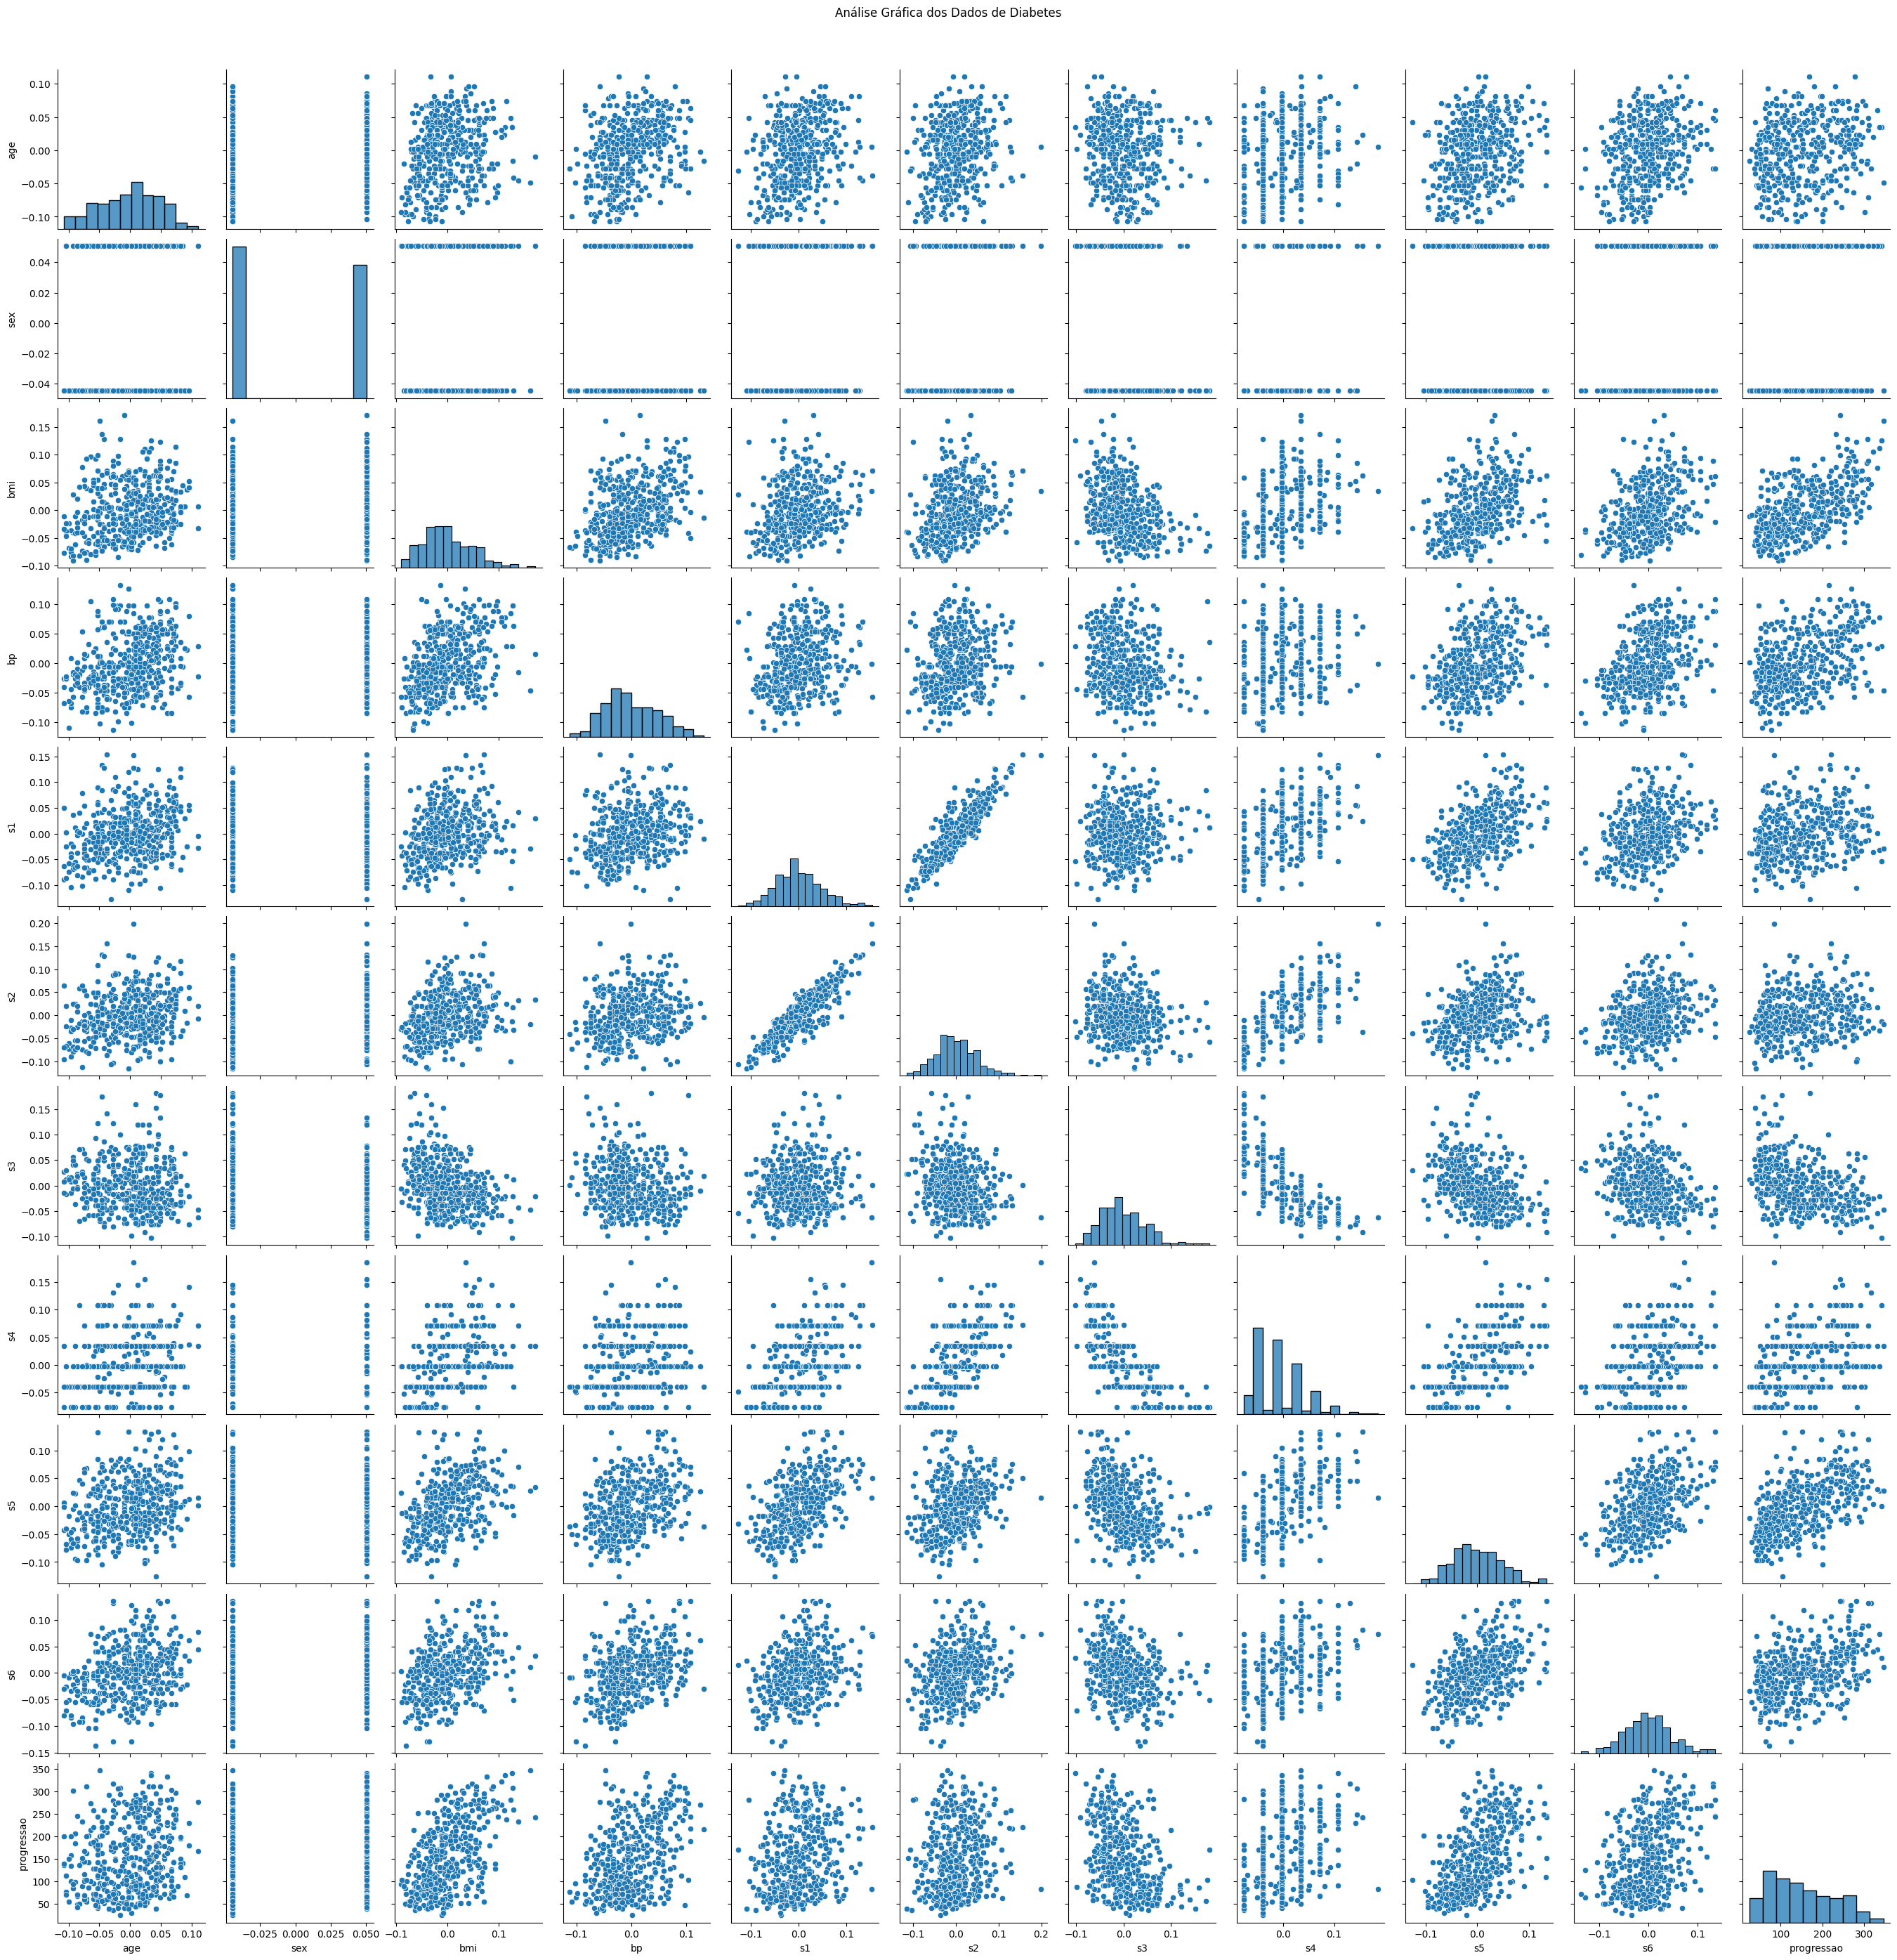

In [15]:
sns.pairplot(db_df)
plt.suptitle("Análise Gráfica dos Dados de Diabetes", y=1.02)
plt.show()

### Correlação entre varáveis:

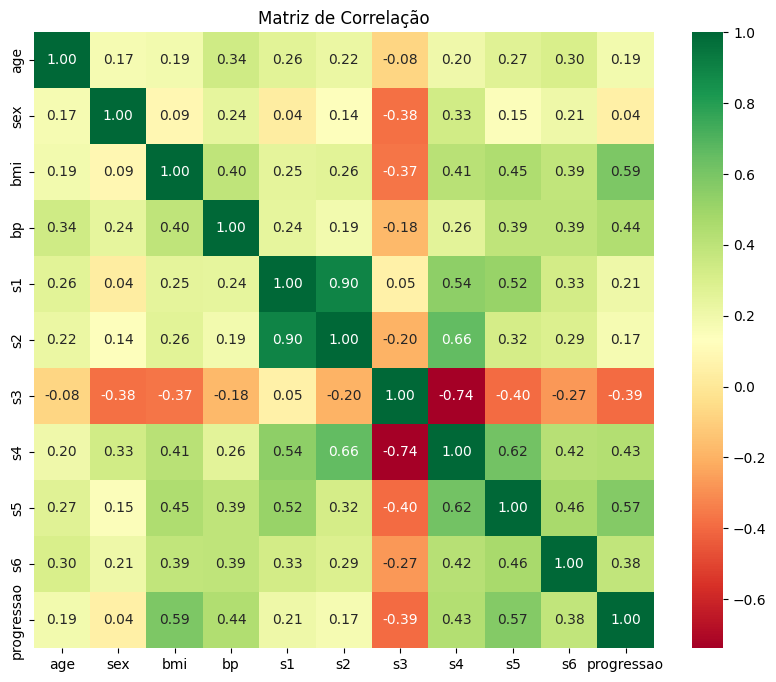

In [16]:
correlation_matrix = db_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Maiores correlações com a progressão :
   - bmi : 0.59
   - s5 : 0.57
   - bp : 0.44
   - s4 : 0.43
   - s3: -0.39    

### Criando modelos baseado na correlação das variáveis:

Verificando o nome das variáveis:

In [17]:
db_df.head(0)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao


Criando uma variável para gravar os resultados:

In [18]:
results = []

### Regressão linear simples com a variável mais correlacionada com nossa resposta:

Modelo 1 - correlação com o **bmi**.

In [19]:
lm1 = sm.OLS.from_formula("progressao ~ bmi", data=db_df)

In [20]:
model_1 = lm1.fit()

In [21]:
print("Análise do Modelo 1:")
print(model_1.summary())
print("=" * 80)

Análise do Modelo 1:
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           3.47e-42
Time:                        18:39:00   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.97

In [22]:
results.append({
    'Modelo': 'Modelo 1',
    'MAE': np.mean(np.abs(y - model_1.predict())),
    'MSE': np.mean((y - model_1.predict())**2),
    'AIC': model_1.aic,
    'BIC': model_1.bic,
    'R²': model_1.rsquared
})

Modelo 2 - correlação com o **bmi e variável s5**.

In [23]:
lm2 = sm.OLS.from_formula("progressao ~ bmi+s5", data=db_df)
model_2 = lm2.fit()
print("Análise do Modelo 2:")
print(model_2.summary())
print("=" * 80)

Análise do Modelo 2:
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     186.6
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           2.25e-59
Time:                        18:39:12   Log-Likelihood:                -2411.2
No. Observations:                 442   AIC:                             4828.
Df Residuals:                     439   BIC:                             4841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.70

In [24]:
results.append({
    'Modelo': 'Modelo 2',
    'MAE': np.mean(np.abs(y - model_2.predict())),
    'MSE': np.mean((y - model_2.predict())**2),
    'AIC': model_2.aic,
    'BIC': model_2.bic,
    'R²': model_2.rsquared
})

Modelo 3 - correlação com o **bmi, variáveis s5 e bp**.

In [25]:
lm3 = sm.OLS.from_formula("progressao ~ bmi+s5+bp", data=db_df)
model_3 = lm3.fit()
print("Análise do Modelo 3:")
print(model_3.summary())
print("=" * 80)

Análise do Modelo 3:
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           7.16e-62
Time:                        18:39:20   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4813.
Df Residuals:                     438   BIC:                             4830.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.65

In [26]:
results.append({
    'Modelo': 'Modelo 3',
    'MAE': np.mean(np.abs(y - model_3.predict())),
    'MSE': np.mean((y - model_3.predict())**2),
    'AIC': model_3.aic,
    'BIC': model_3.bic,
    'R²': model_3.rsquared
})

Modelo 4 - correlação com o **bmi, variáveis s5, bp e s4**.

In [27]:
lm4 = sm.OLS.from_formula("progressao ~ bmi+s5+bp+s4", data=db_df)
model_4 = lm4.fit()
print("Análise do Modelo 4:")
print(model_4.summary())
print("=" * 80)

Análise do Modelo 4:
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           5.41e-61
Time:                        18:39:29   Log-Likelihood:                -2402.1
No. Observations:                 442   AIC:                             4814.
Df Residuals:                     437   BIC:                             4835.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.65

In [28]:
results.append({
    'Modelo': 'Modelo 4',
    'MAE': np.mean(np.abs(y - model_4.predict())),
    'MSE': np.mean((y - model_4.predict())**2),
    'AIC': model_4.aic,
    'BIC': model_4.bic,
    'R²': model_4.rsquared
})

Modelo 5 - correlação com o **bmi, variáveis s5, bp, s4 e s3**.

In [29]:
lm5 = sm.OLS.from_formula("progressao ~ bmi+s5+bp+s4+s3", data=db_df)
model_5 = lm5.fit()
print("Análise do Modelo 5:")
print(model_5.summary())
print("=" * 80)

Análise do Modelo 5:
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     85.09
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           2.88e-62
Time:                        18:39:38   Log-Likelihood:                -2396.7
No. Observations:                 442   AIC:                             4805.
Df Residuals:                     436   BIC:                             4830.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.62

In [30]:
results.append({
    'Modelo': 'Modelo 5',
    'MAE': np.mean(np.abs(y - model_5.predict())),
    'MSE': np.mean((y - model_5.predict())**2),
    'AIC': model_5.aic,
    'BIC': model_5.bic,
    'R²': model_5.rsquared
})

Modelo 6 - correlação com o **bmi, variáveis s5, bp, s4, s5 e s6**.

In [31]:
lm6 = sm.OLS.from_formula("progressao ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6", data=db_df)
model_6 = lm6.fit()
print("Análise do Modelo 6:")
print(model_6.summary())
print("=" * 80)

Análise do Modelo 6:
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           3.83e-62
Time:                        18:39:46   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.57

In [32]:
results.append({
    'Modelo': 'Modelo 6',
    'MAE': np.mean(np.abs(y - model_6.predict())),
    'MSE': np.mean((y - model_6.predict())**2),
    'AIC': model_6.aic,
    'BIC': model_6.bic,
    'R²': model_6.rsquared
})

### Criando um dataframe com os resultados de comparação:

In [33]:
results_df = pd.DataFrame(results)
print(results_df)

     Modelo   MAE     MSE     AIC     BIC   R²
0  Modelo 1 51.80 3890.46 4912.04 4920.22 0.34
1  Modelo 2 46.80 3205.19 4828.40 4840.67 0.46
2  Modelo 3 45.89 3083.05 4813.23 4829.59 0.48
3  Modelo 4 45.84 3075.77 4814.18 4834.64 0.48
4  Modelo 5 44.78 3001.28 4805.34 4829.89 0.49
5  Modelo 6 43.28 2859.70 4793.99 4838.99 0.52


OBS: Nem sempre as métricas irão coincidir. Por isso devemos entender o que será melhor para o nosso modelo.